# Windrose

In [114]:
from __future__ import print_function
import netCDF4
import wrf
import windrose
import numpy
import matplotlib
%matplotlib inline
import matplotlib.animation
import ipywidgets
import IPython.display 

ncfile = netCDF4.Dataset("wrfout_d01.nc")

In [172]:
U = wrf.getvar(ncfile, "U") # wind U velocity - x wind component
V = wrf.getvar(ncfile, "V") # wind V velocity - y wind component
U_ndarray = wrf.to_np(U)
V_ndarray = wrf.to_np(V)
speed = []
direction = []
for i in range(U_ndarray.shape[0]):
    speed.append(numpy.sqrt(U_ndarray[i].flatten()**2 + V_ndarray[i].flatten()**2 ))  # in m/s
    direction.append(numpy.arctan2(V_ndarray[i].flatten(), U_ndarray[i].flatten()))   #in radian
#len(speed)

In [171]:
#speed = [numpy.sqrt(u**2+v**2) for u, v in zip(U_ndarray.flatten(),V_ndarray.flatten())] 

In [177]:
def handle_slider_change(height, *args):
    windrose.plot_windrose_np(numpy.rad2deg(direction[height]), var= speed[height], 
                           kind='contourf', lw=6, nsector=16, bins = 6)
    
interactive_plot = ipywidgets.interactive(handle_slider_change, height= (0,U_ndarray.shape[0]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '640px'   #set the height of the interactive plot so it won't change size
interactive_plot

interactive(children=(IntSlider(value=29, description='height', max=58), Output(layout=Layout(height='640px'))), _dom_classes=('widget-interact',))

In [174]:
button_save = ipywidgets.Button(description='save windrose')
display(button_save)
def on_button_clicked(b):
    matplotlib.pyplot.savefig('windrose_h'+str(interactive_plot.children[0].value).zfill(len(str(U_ndarray.shape[0])))+
                              '.png')

button_save.on_click(on_button_clicked)
def handle_slider_change(height, *args):
    windrose.plot_windrose_np(numpy.rad2deg(direction[height]), var= speed[height], 
                           kind='contourf', lw=6, nsector=16, bins = 6)

interactive_plot = ipywidgets.interactive(handle_slider_change, height= (0,U_ndarray.shape[0]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '640px'  
interactive_plot

Button(description='save windrose', style=ButtonStyle())

interactive(children=(IntSlider(value=29, description='height', max=58), Output(layout=Layout(height='640px'))), _dom_classes=('widget-interact',))

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/windrose/windrose.py:394: MatplotlibDeprecationWarning: The poly_between function was deprecated in version 2.2.
  xs, ys = poly_between(angles, 0, val)


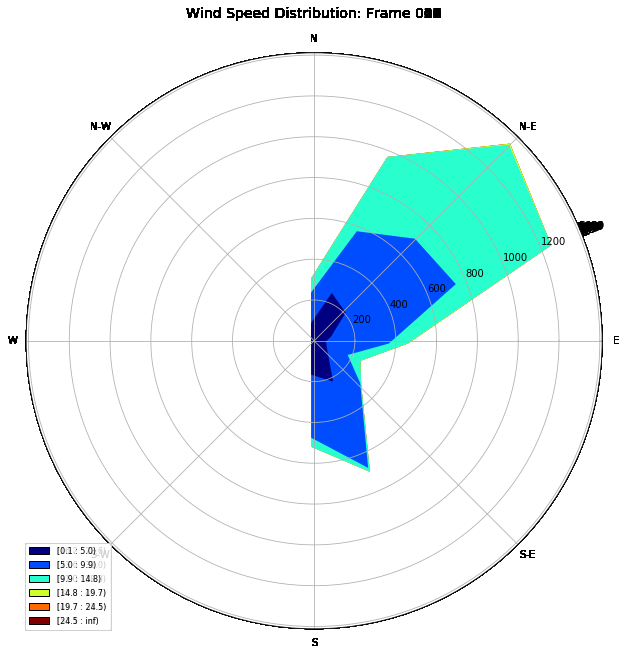

In [186]:
def drawwindrose(h,ax, title):
    ax.set_title(title, fontsize=14)
    cs = ax.contourf(numpy.rad2deg(direction[h]), speed[h], nsector=16,lw=6)
    ax.set_legend()
    return cs
def myanimate(h):   
    ax = windrose.WindroseAxes.from_ax(fig=fig) 
    new_contour = drawwindrose(h,ax, 'Wind Speed Distribution: Frame %03d'%(h)) 
    return new_contour
FFMpegWriter = matplotlib.animation.writers['ffmpeg']
metadata = dict(title='Wind Speed Distribution from 2018-01-09T06:00:00', artist='Metos@UIO',
                comment='Movie for Wind Speed Distribution from 2018-01-09T06:00:00')
writer = FFMpegWriter(fps=20, metadata=metadata, bitrate=1800)

fig= matplotlib.pyplot.figure(figsize=[10,10])

ani = matplotlib.animation.FuncAnimation(fig, myanimate, frames=numpy.arange(U_ndarray.shape[0]), 
                                         interval=50*U_ndarray.shape[0])
ani.save("writer_WindSpeedDistribution_200180109.mp4", writer = writer)

In [176]:
IPython.display.HTML(ani.to_html5_video())

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/windrose/windrose.py:394: MatplotlibDeprecationWarning: The poly_between function was deprecated in version 2.2.
  xs, ys = poly_between(angles, 0, val)


In [181]:
def handle_slider_change(height, *args):
    ax = windrose.WindroseAxes.from_ax()
    ax.bar(numpy.rad2deg(direction[height]),var=speed[height],nsector=16,bins=6,
           normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title('Wind Speed Distribution: Frame %03d'%(height),fontsize=14)
    #windrose.plot_windrose_np(numpy.rad2deg(direction[height]),var=speed[height],kind='contourf',lw=6,nsector=16,bins=6)
interactive_plot = ipywidgets.interactive(handle_slider_change, height= (0,U_ndarray.shape[0]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '640px'   #set the height of the interactive plot so it won't change size
interactive_plot

interactive(children=(IntSlider(value=29, description='height', max=58), Output(layout=Layout(height='640px'))), _dom_classes=('widget-interact',))

In [182]:
button_save = ipywidgets.Button(description='save windrose')
display(button_save)
def on_button_clicked(b):
    matplotlib.pyplot.savefig('windrose_h'+str(interactive_plot.children[0].value).zfill(len(str(U_ndarray.shape[0])))+
                              '.png')

button_save.on_click(on_button_clicked)
def handle_slider_change(height, *args):
    ax = windrose.WindroseAxes.from_ax()
    ax.bar(numpy.rad2deg(direction[height]),var=speed[height],nsector=16,bins=6,
           normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title('Wind Speed Distribution: Frame %03d'%(height),fontsize=14)

interactive_plot = ipywidgets.interactive(handle_slider_change, height= (0,U_ndarray.shape[0]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '640px'  
interactive_plot

Button(description='save windrose', style=ButtonStyle())

interactive(children=(IntSlider(value=29, description='height', max=58), Output(layout=Layout(height='640px'))), _dom_classes=('widget-interact',))

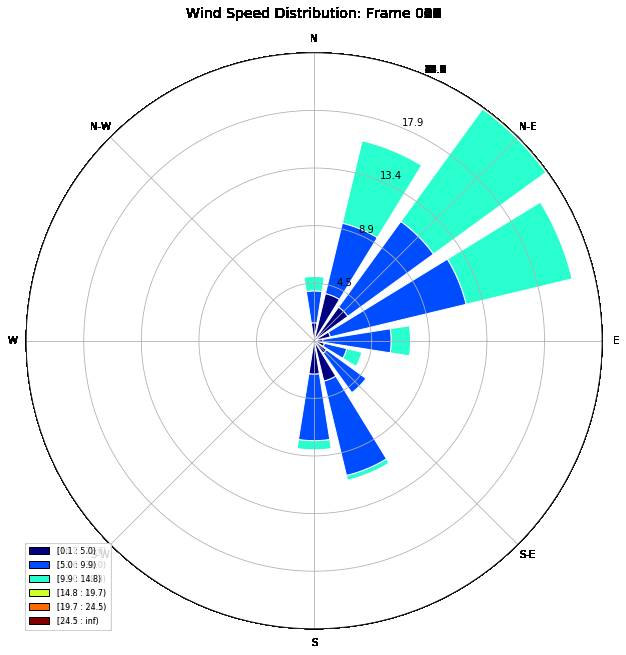

In [184]:
def drawwindrose(h,ax, title):
    ax.set_title(title, fontsize=14)
    cs = ax.bar(numpy.rad2deg(direction[h]),var=speed[h],nsector=16,bins=6,normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    return cs
def myanimate(h):   
    ax = windrose.WindroseAxes.from_ax(fig=fig) 
    new_contour = drawwindrose(h,ax, 'Wind Speed Distribution: Frame %03d'%(h)) 
    return new_contour
FFMpegWriter = matplotlib.animation.writers['ffmpeg']
metadata = dict(title='Wind Speed Distribution from 2018-01-09T06:00:00', artist='Metos@UIO',
                comment='Movie for Wind Speed Distribution from 2018-01-09T06:00:00')
writer = FFMpegWriter(fps=20, metadata=metadata, bitrate=1800)

fig= matplotlib.pyplot.figure(figsize=[10,10])

ani2 = matplotlib.animation.FuncAnimation(fig, myanimate, frames=numpy.arange(U_ndarray.shape[0]), 
                                         interval=50*U_ndarray.shape[0])
ani2.save("writer_WindSpeedDistributionnormed_200180109.mp4", writer = writer)

In [185]:
IPython.display.HTML(ani2.to_html5_video())

In [ ]:
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('/styles/custom.css')